# **My notebook**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
!git clone https://github.com/Oumaima117/WasteDetection_Oumaima_kharbouch_ProjetImageProcessing/blob/main/projet

Cloning into 'projet'...
fatal: repository 'https://github.com/Oumaima117/WasteDetection_Oumaima_kharbouch_ProjetImageProcessing/blob/main/projet/' not found


### ** Modèle1: ANN **

In [ ]:
from os import listdir
import os
from os.path import join
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2

In [ ]:
train_o='/content/drive/MyDrive/DATASET/TRAIN/O'#la proportion destinée à l'entrainement de la dataset des matières organinque
train_r='/content/drive/MyDrive/DATASET/TRAIN/R'#la proportion destinée à l'entrainement de la dataset des matières destinées au recyclage
test_o='/content/drive/MyDrive/DATASET/TEST/O'##la proportion destinée au test de la dataset des matières organinques
test_r='/content/drive/MyDrive/DATASET/TEST/R'#la proportion destinée au test de la dataset des matières destinées au recyclage

In [ ]:
# "0" for the organic food and "1" for the not.
x = np.concatenate((X1[0:400],X2[0:400]), axis = 0)

zero = np.zeros(400)
one = np.ones(400)

y = np.concatenate((zero,one), axis = 0).reshape(-1,1)
print("x shape :", x.shape)
print("y shape :", y.shape)

x shape : (800, 4096)
y shape : (800, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.15,random_state=42)
number_of_train=x_train.shape[0]
number_of_test=x_test.shape[0]

In [ ]:
print("X train ",x_train.shape)
print("X test ",x_test.shape)

X train  (680, 4096)
X test  (120, 4096)


In [ ]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)


x train:  (4096, 680)
x test:  (4096, 120)
y train:  (1, 680)
y test:  (1, 120)


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units =128 , kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu')) 
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu')) 
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu')) 
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu')) 
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) 
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 
    return classifier               

classifier = KerasClassifier(build_fn = build_classifier, epochs = 50)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 4)  
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))


Epoch 1/50
16/16 [==============================] - 1s 6ms/step - loss: 0.6916 - accuracy: 0.4949
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6667 - accuracy: 0.5588
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6861 - accuracy: 0.5223
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6836 - accuracy: 0.4865
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6720 - accuracy: 0.5237
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6824 - accuracy: 0.5626
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6761 - accuracy: 0.4972
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6576 - accuracy: 0.6214
Epoch 9/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6495 - accuracy: 0.5714
Epoch 10/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.5575
Epoch 11/50
16/16 [

#                                          modèle 2:   **CNN**

In [ ]:
# libraries
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
train_path= "/content/drive/MyDrive/DATASET/TRAIN"
test_path= "/content/drive/MyDrive/DATASET/TEST"

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2)) # output
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(train_path, batch_size = batch_size,color_mode= "rgb", class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 1400 // batch_size,
        epochs=10,
        validation_data = test_generator,
        validation_steps = 600 // batch_size)

Found 22623 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
43/43 [==============================] - 1824s 42s/step - loss: 1.8266 - accuracy: 0.6149 - val_loss: 0.4670 - val_accuracy: 0.8351
Epoch 2/10
43/43 [==============================] - 1531s 36s/step - loss: 0.6021 - accuracy: 0.7317 - val_loss: 0.4392 - val_accuracy: 0.8385
Epoch 3/10
43/43 [==============================] - 1398s 33s/step - loss: 0.4680 - accuracy: 0.8031 - val_loss: 0.3974 - val_accuracy: 0.8663
Epoch 4/10
43/43 [==============================] - 1184s 28s/step - loss: 0.5509 - accuracy: 0.7705 - val_loss: 0.3538 - val_accuracy: 0.8750
Epoch 5/10
43/43 [==============================] - 1089s 25s/step - loss: 0.4530 - accuracy: 0.8141 - val_loss: 0.3482 - val_accuracy: 0.8594
Epoch 6/10
43/43 [==============================] - 1022s 24s/step - loss: 0.4940 - accuracy: 0.7969 - val_loss: 0.4439 - val_accuracy: 0.8090
Epoch 7/10
43/43 [==============================] - 936s 22s/step - loss: 0.4557 - accuracy: 0.8090 - val_loss: 0.4813 - val_accuracy: 0.7535


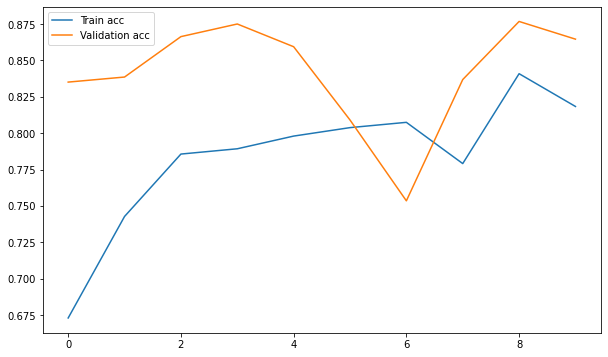

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

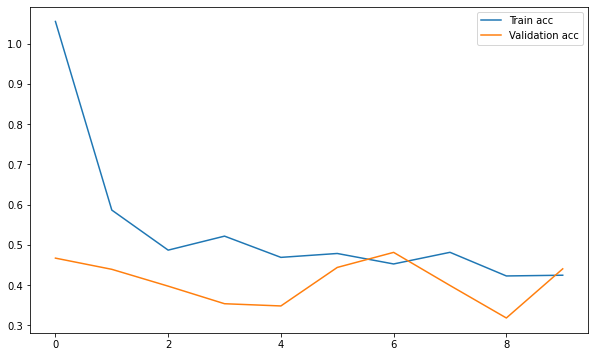

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["loss"], label = "Train acc")
plt.plot(hist.history["val_loss"], label = "Validation acc")
plt.legend()
plt.show()

# **Modèle N°3**

In [ ]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow_hub as hub


In [ ]:
image_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,validation_split=0.2)

img_data_train=image_generator.flow_from_directory('/content/drive/MyDrive/DATASET/TRAIN',
                                             target_size=(224,224),subset='training'
                                             )

img_data_val=image_generator.flow_from_directory('/content/drive/MyDrive/DATASET/TEST',
                                             target_size=(224,224),#Batch size can be changed ,by default its 32
                                             subset='validation') 

Found 18100 images belonging to 2 classes.
Found 502 images belonging to 2 classes.


In [ ]:
img_data_train.class_indices

{'O': 0, 'R': 1}

In [ ]:
feature_extract_url="https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"

    
feature_extraction_layer=hub.KerasLayer(str(feature_extract_url),input_shape=(224,224,3))

feature_extraction_layer.trainable=False

In [ ]:
model=tf.keras.Sequential([
feature_extraction_layer,
keras.layers.Dropout(0.5),

tf.keras.layers.Dense(50,activation='relu'),
keras.layers.Dropout(0.3),
    
tf.keras.layers.Dense(img_data_train.num_classes,activation='sigmoid')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
steps=np.ceil(img_data_train.samples/img_data_train.batch_size)

history=model.fit(img_data_train,epochs=5,validation_data=img_data_val,steps_per_epoch=steps)

Epoch 1/5
566/566 [==============================] - 6366s 11s/step - loss: 0.3109 - accuracy: 0.8842 - val_loss: 0.1198 - val_accuracy: 0.9701
Epoch 2/5
566/566 [==============================] - 2976s 5s/step - loss: 0.1763 - accuracy: 0.9370 - val_loss: 0.1259 - val_accuracy: 0.9562
Epoch 3/5
566/566 [==============================] - 2923s 5s/step - loss: 0.1483 - accuracy: 0.9454 - val_loss: 0.1517 - val_accuracy: 0.9502
Epoch 4/5
566/566 [==============================] - 2886s 5s/step - loss: 0.1386 - accuracy: 0.9481 - val_loss: 0.1668 - val_accuracy: 0.9442
Epoch 5/5
566/566 [==============================] - 2881s 5s/step - loss: 0.1271 - accuracy: 0.9524 - val_loss: 0.1612 - val_accuracy: 0.9382


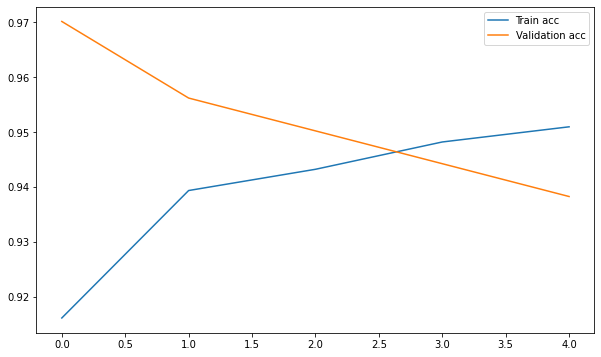

In [ ]:
plt.figure(figsize=[10,10])
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

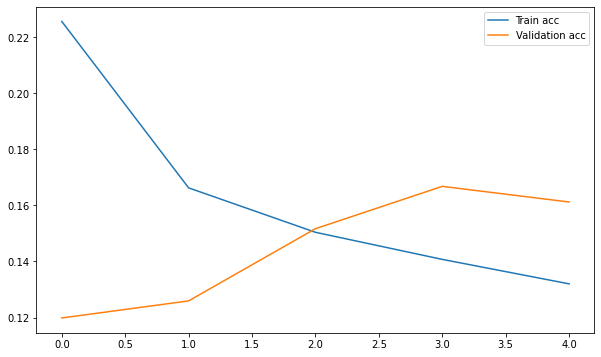

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(history.history["loss"], label = "Train acc")
plt.plot(history.history["val_loss"], label = "Validation acc")
plt.legend()
plt.show()

# **Modèle 4: VGG16**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import skimage.io
import tensorflow 
import tqdm
import glob

from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, BatchNormalization, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array

%matplotlib inline

In [ ]:
train_o = glob.glob('/content/drive/MyDrive/DATASET/TRAIN/O/*.jpg')
a = len(train_o)

In [ ]:
train_r = glob.glob('/content/drive/MyDrive/DATASET/TRAIN/R/*.jpg')
b = len(train_r)

In [ ]:
# Total training images 

print("Nos of training samples: {}".format(a+b))

Nos of training samples: 22623


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   zoom_range = 0.4,
                                   rotation_range = 10,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1.0 / 255.0)

In [ ]:
train_dataset  = train_datagen.flow_from_directory(directory = '/content/drive/MyDrive/DATASET/TRAIN',
                                                   target_size = (224,224),
                                                   class_mode = 'binary',
                                                   batch_size = 128, 
                                                   subset = 'training')

Found 18100 images belonging to 2 classes.


In [ ]:
# Class Indices 

train_dataset.class_indices

{'O': 0, 'R': 1}

In [ ]:
valid_dataset = valid_datagen.flow_from_directory(directory = '/content/drive/MyDrive/DATASET/TRAIN',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 128, 
                                                  subset = 'validation')

Found 4523 images belonging to 2 classes.


In [ ]:
# Defining Model

base_model = VGG16(input_shape=(224,224,3), 
                   include_top=False,
                   weights="imagenet")

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# Freezing Layers 

for layer in base_model.layers:
    layer.trainable=False

In [ ]:
# Summary

base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# Defining Layers

model=Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# Summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 25088)             100352    
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation (Activation)      (None, 1024)              0

In [ ]:
# Model Compile 
OPT    = tensorflow.keras.optimizers.Adam(lr=0.001)

model.compile(loss='binary_crossentropy',
              metrics=[tensorflow.keras.metrics.AUC(name = 'auc')],
              optimizer=OPT)

In [ ]:
# Defining Callbacks

filepath = './best_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_auc', 
                              mode = 'max' , 
                              patience = 5,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [ ]:
# Model Fitting 

model_history=model.fit(train_dataset,
                        validation_data=valid_dataset,
                        epochs = 4,
                        callbacks = callback_list,
                        verbose = 1)

Epoch 1/4
142/142 [==============================] - 15104s 106s/step - loss: 0.4206 - auc: 0.9024 - val_loss: 0.2984 - val_auc: 0.9471

Epoch 00001: val_auc improved from -inf to 0.94714, saving model to ./best_weights.hdf5
Epoch 2/4
142/142 [==============================] - 10888s 77s/step - loss: 0.2706 - auc: 0.9553 - val_loss: 0.2745 - val_auc: 0.9562

Epoch 00002: val_auc improved from 0.94714 to 0.95616, saving model to ./best_weights.hdf5
Epoch 3/4
142/142 [==============================] - 10810s 76s/step - loss: 0.2493 - auc: 0.9620 - val_loss: 0.2892 - val_auc: 0.9517

Epoch 00003: val_auc did not improve from 0.95616
Epoch 4/4
 89/142 [=================>............] - ETA: 54:08 - loss: 0.2182 - auc: 0.9706

In [ ]:
# Evaluating Loss and AUC - Test Data 

model.evaluate(test_data)

20/20 [==============================] - 1259s 63s/step - loss: 0.8304 - auc: 0.4296


[0.8204374313354492, 0.42705076932907104]

# `                                                  Modèle 5 :

> Bloc en retrait



In [ ]:
import numpy as np

import cv2

import tensorflow as tf
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from PIL import Image

In [ ]:
train_path = '/content/drive/MyDrive/DATASET/TRAIN'
test_path = '/content/drive/MyDrive/DATASET/TRAIN'
IMG_BREDTH = 30
IMG_HEIGHT = 60
num_classes = 2

In [ ]:
#ImageDataGenerator class to perform data augmentation
train_batch = ImageDataGenerator(featurewise_center=False,
                                 samplewise_center=False, 
                                 featurewise_std_normalization=False, 
                                 samplewise_std_normalization=False, 
                                 zca_whitening=False, 
                                 rotation_range=45, 
                                 width_shift_range=0.2, 
                                 height_shift_range=0.2, 
                                 horizontal_flip=True, 
                                 vertical_flip=False).flow_from_directory('/content/drive/MyDrive/DATASET/TRAIN', 
                                                                          target_size=(IMG_HEIGHT, IMG_BREDTH), 
                                                                          classes=['O', 'R'], 
                                                                          batch_size=100)

test_batch = ImageDataGenerator().flow_from_directory('/content/drive/MyDrive/DATASET/TRAIN', 
                                                      target_size=(IMG_HEIGHT, IMG_BREDTH), 
                                                      classes=['O', 'R'], 
                                                      batch_size=100)

Found 22623 images belonging to 2 classes.
Found 22623 images belonging to 2 classes.


In [ ]:
def cnn_model():
    
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_BREDTH,3)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))
              
    model.summary()
              
    return model

def use_model(path):
    
    model = load_model('best_waste_classifier.h5')
    pic = plt.imread(path)
    pic = cv2.resize(pic, (IMG_BREDTH, IMG_HEIGHT))
    pic = np.expand_dims(pic, axis=0)
    classes = model.predict_classes(pic)
    return classes

In [ ]:
model = cnn_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 28, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 11, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 9, 64)         3

In [ ]:

checkpoint = ModelCheckpoint('best_waste_classifier.h5', 
                             monitor='val_loss', 
                             verbose=0, 
                             save_best_only=True, 
                             mode='auto')

In [ ]:
a=model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(a)

None


In [ ]:
model = model.fit_generator(train_batch,  
                             validation_data=test_batch,  
                             epochs=100, 
                             verbose=1, 
                            callbacks=[checkpoint])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
227/227 [==============================] - 13619s 60s/step - loss: 7.5013 - accuracy: 0.5685 - val_loss: 0.4862 - val_accuracy: 0.8014
Epoch 2/100
227/227 [==============================] - 285s 1s/step - loss: 0.5564 - accuracy: 0.7541 - val_loss: 0.5460 - val_accuracy: 0.7551
Epoch 3/100
227/227 [==============================] - 279s 1s/step - loss: 0.4718 - accuracy: 0.7988 - val_loss: 0.4815 - val_accuracy: 0.7933
Epoch 4/100
227/227 [==============================] - 290s 1s/step - loss: 0.4507 - accuracy: 0.8049 - val_loss: 0.3995 - val_accuracy: 0.8216
Epoch 5/100
227/227 [==============================] - 283s 1s/step - loss: 0.4367 - accuracy: 0.8120 - val_loss: 0.5224 - val_accuracy: 0.7576
Epoch 6/100
227/227 [==============================] - 278s 1s/step - loss: 0.4381 - accuracy: 0.8072 - val_loss: 0.3849 - val_accuracy: 0.8337
Epoch 7/100
227/227 [==============================] - 283s 1s/step - loss: 0.4373 - accuracy: 0.8097 - val_loss: 0.4802 - val_accura